# <font color=black> Analysis - Resting state duration in the spinal cord </font>
<hr style="border:1px solid black">

**The goal of this analysis is to investigate the reproducibility of spinal networks extracted using different resting state duration.**

**METHODS CONSIDERED:**
- Independent Component Analysis – called `ica` in this script
- Innovation-driven CoActivation Pattern analysis  – called `icap` in this script

**DATASETS:**
- A dataset covering C1 to C8 spinal levels, with a resolution of 1.6x1.6x4mm<sup>3</sup>  and a TR of 1.55s – called `mtl` in this script
- A dataset covering C5 to C8 spinal levels, with a resolution of 1x1x3mm<sup>3</sup> and a TR of 2.5s – called `gva` in this script


**ANALYSES:**
- I. Qualitative:
    > I.1 Visualizing components for on suject compared to the group map  
    > I.2 Create a video for illustration  
    > I.3 Plot heatmap of the distribution  
- II. Quantitative analyses: 
    > II.1 Save quantitative measures for each dataset: Dice or Euclidean Distance
    > II.2 Quantitative plots
    

In [1]:
import sys,json, glob

sys.path.append('/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/hc_project_analyses/code/')

from plotting import Plotting
from spine_only_analysis import SpineOnlyAnalysis
import pandas as pd

%matplotlib inline
%load_ext autoreload
%autoreload 2

/cerebro/cerebro1/dataset/bmpd/derivatives/thibault_test/code/toolbox/bmpd_python/lib/python3.6/site-packages/nilearn/__init__.py:69: FutureWarning: Python 3.6 support is deprecated and will be removed in release 0.10 of Nilearn. Consider switching to Python 3.8 or 3.9.
  _python_deprecation_warnings()


# Initialization

### Load configuration file 

In [160]:
# Load the config files with all informations (i.e., all datasets, methods, etc.)
with open('../config/config_spine_only_CL.json') as config_file:
    config = json.load(config_file)
    


# <font color=#00988c> I. Qualitative evaluation
### <font color=#00988c> I.1  </font> Visualizing components for on suject compared to the group map

### Dataset: "gva"

COMPUTING SIMILARITY WITH METHOD: Dice
...Compute similarity between pairs of components
...Ordering components based on maximum weight matching
DONE!


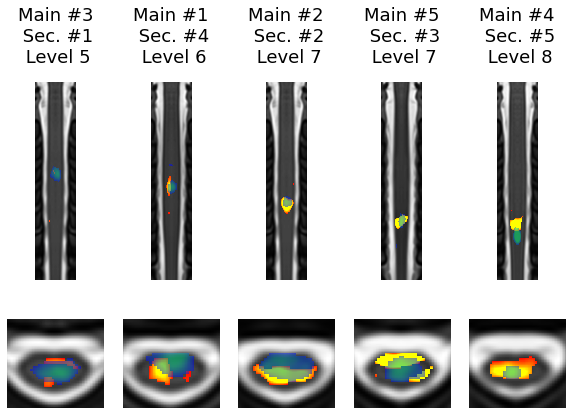

In [88]:
# Define parameters for the dataset to visualize
# Note: it is possible to look at a single dataset (in that case, just define params1), or to compare two (in that case, also add params2)
# Each param dict has 3 values: k, dataset and analysis

dataset="gva"
config["output_dir"]= "/ICA/results_spine_only/results/individual_analyses/" + dataset + "/maps/"
config["output_tag"]= "Indiv"

for sub in config['list_subjects'][dataset]:  #12 is a good subject for illustration
    params_qual_1 = {'k':(9 if dataset == 'mtl' else 5), 'dataset':dataset, 'analysis':'ica', 'subject':sub,'lthresh':1.5}
    
    #>>> To plot and individual maps uncomment the following lines:
    #plotting = Plotting(config,'spinalcord',params1=params_qual_1,sorting_method='rostrocaudal_CoM')
    #plotting.sc_plot(show_spinal_levels=False, k_per_line=params_qual_1['k'], lthresh=None, uthresh=3, save_results=True)

for sub in ['12']:  #12 is a good subject for illustration
    params_qual_1 = {'k':(9 if dataset == 'mtl' else 5), 'dataset':dataset, 'analysis':'ica', 'subject':sub,'lthresh':1.5}

    
params_qual_2 = {'k':(9 if dataset == 'mtl' else 5), 'dataset':dataset, 'analysis':'ica'}
plotting = Plotting(config,'spinalcord',params1=params_qual_1,params2=params_qual_2,sorting_method='rostrocaudal_CoM')
plotting.sc_plot(show_spinal_levels=False, k_per_line=params_qual_1['k'], lthresh=None, uthresh=3, save_results=False)


### Dataset: "mtl"

COMPUTING SIMILARITY WITH METHOD: Dice
...Compute similarity between pairs of components
...Ordering components based on maximum weight matching
DONE!


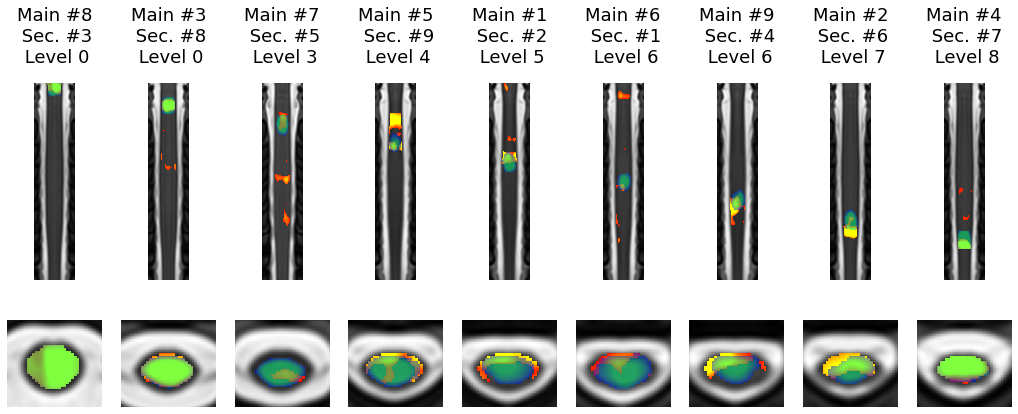

In [89]:
# Define parameters for the dataset to visualize
# Note: it is possible to look at a single dataset (in that case, just define params1), or to compare two (in that case, also add params2)
# Each param dict has 3 values: k, dataset and analysis

dataset="mtl"
config["output_dir"]= "/ICA/results_spine_only/results/individual_analyses/" + dataset + "/maps/"
config["output_tag"]= "Indiv"

for sub in config['list_subjects'][dataset]:  #12 is a good subject for illustration
    params_qual_1 = {'k':(9 if dataset == 'mtl' else 5), 'dataset':dataset, 'analysis':'ica', 'subject':sub,'lthresh':1.5}
    
    #>>> To plot and individual maps uncomment the following lines:
    #plotting = Plotting(config,'spinalcord',params1=params_qual_1,sorting_method='rostrocaudal_CoM')
    #plotting.sc_plot(show_spinal_levels=False, k_per_line=params_qual_1['k'], lthresh=None, uthresh=3, save_results=True)

for sub in ['99']:  #12 is a good subject for illustration
    params_qual_1 = {'k':(9 if dataset == 'mtl' else 5), 'dataset':dataset, 'analysis':'ica', 'subject':sub,'lthresh':1.5}

    
params_qual_2 = {'k':(9 if dataset == 'mtl' else 5), 'dataset':dataset, 'analysis':'ica'}
plotting = Plotting(config,'spinalcord',params1=params_qual_1,params2=params_qual_2,sorting_method='rostrocaudal_CoM')
plotting.sc_plot(show_spinal_levels=False, k_per_line=params_qual_1['k'], lthresh=1.5, uthresh=3, save_results=False)


### <font color=#00988c> I.2 </font> Create a video for illustration

In [90]:
import cv2

redo=False # put True for create an other video
if redo==True:
    dataset="mtl"
    analysis='ica'
    config["output_dir"]= "/ICA/results_spine_only/results/individual_analyses/" + dataset + "/maps/"
    config["output_tag"]= "Indiv"
    img_array = []
    for filename in glob.glob(config["main_dir"] + config["output_dir"] + config["output_tag"] + "*.png"):
        img = cv2.imread(filename)
        height, width, layers = img.shape
        size = (width,height)
        img_array.append(img)

    out = cv2.VideoWriter(config["main_dir"] + config["output_dir"]  +'Indiv_spinalcord_'+dataset+'_' + analysis + '_movie.avi',cv2.VideoWriter_fourcc(*'MJPG'), 1, size)


    for i in range(len(img_array)):
        out.write(img_array[i])
    out.release()

### <font color=#00988c> I.3 </font> Heatmap of the distribution

In [84]:
name2

'/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/mtl/spinalcord/K_60/comp_zscored/CanICA_21sbj_spinalcord_spinalcord_4D_K_60_z.nii.gz'

# <font color=#00988c> Quantitative analyses
### <font color=#00988c>  II.1 </font> Save quantitative measures for each dataset

In [186]:
## prob with tag_filename ICA !!!! config["data"][dataset][ana]["spinalcord"]

{'dir': '/ICA/results_spine_only/mtl/spinalcord/', 'tag_filename': '_z.nii.gz'}

In [184]:
dataframe={};dataframe_comp={}
extract=True  # put extract=True to extract the values 
for dataset in ["mtl","gva"]:
    dataframe[dataset]={};dataframe_comp[dataset]={}
    for ana in ["ica"]:
        dataframe[dataset][ana]={};dataframe_comp[dataset][ana]={}
        
        for measure in ["Dice"]:#,"EuclideanDistance"]:
            
            config["output_dir"]= "/ICA/results_spine_only/results/individual_analyses/" + dataset + "/"+measure+"/"
            config["output_tag"]= "Indiv"
            
            config["data"][dataset][ana]["spinacord"]['tag_filename']= "Indiv"

            if extract == True:
                params_quant_1 = {'k_range':(range(9,10) if dataset == 'mtl' else range(5,6)),'dataset':dataset, 'analysis':ana}

                for sub in config['list_subjects'][dataset]:
                    params_quant_2 = {'k_range':(range(9,10) if dataset == 'mtl' else range(5,6)), 'dataset':dataset, 'analysis':ana, 'subject':'sub-'+sub}

                spine_analysis = SpineOnlyAnalysis(config,params1=params_quant_1,params2=params_quant_2,load_subjects=True)
                if measure == "Dice":
                    print(params_quant_1["k_range"][0])
                    spine_analysis.spatial_similarity(k1=params_quant_1["k_range"][0],k2=params_quant_2["k_range"][0],similarity_method='Dice',save_results=True,save_figure=False)

                elif measure =="EuclideanDistance":
                    spine_analysis.spatial_similarity(k1=params_quant_1["k_range"][0],k2=params_quant_2["k_range"][0],similarity_method='Euclidean distance',save_results=True,save_figure=False)



            input_comp= glob.glob(config["main_dir"] +config["output_dir"] + config["output_tag"] + "*_" +ana+ "_*indiv_comp.txt")[0]
            input= glob.glob(config["main_dir"] +config["output_dir"] + config["output_tag"] + "*_" +ana+ "_*indiv.txt")[0]
            
            dataframe_comp[dataset][ana][measure]=pd.read_csv(input_comp, header=0,sep=' ')
            dataframe[dataset][ana][measure]=pd.read_csv(input, header=0,sep=' ')
            
frames=[dataframe["mtl"]["ica"]["Dice"],dataframe["gva"]["ica"]["Dice"],dataframe["mtl"]["icap"]["Dice"],dataframe["gva"]["icap"]["Dice"]]; frames=pd.concat(frames)
frames_comp=[dataframe_comp["mtl"]["ica"]["Dice"],dataframe_comp["gva"]["ica"]["Dice"],dataframe_comp["mtl"]["icap"]["Dice"],dataframe_comp["gva"]["icap"]["Dice"]] ; frames_comp=pd.concat(frames_comp)

/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/mtl/spinalcord//K_9/comp_zscored/*_z.nii.gz*
subject loading ...
9
None
METHOD 1: Comparing two sets of components at specific K values 
mtl_ica at K = 9 vs mtl_ica2 at K = 9 



IndexError: tuple index out of range

### <font color=#00988c>  II.2 </font> Quantative plots

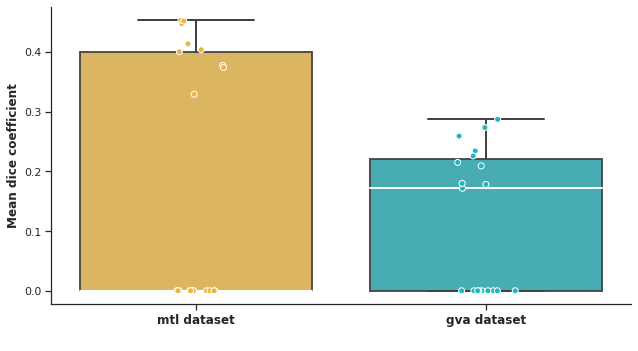

In [179]:
frames=[dataframe["mtl"]["ica"]["Dice"],dataframe["gva"]["ica"]["Dice"]]; frames=pd.concat(frames)

import seaborn as sns
colors=['#efb537','#20b5bf'] #'#273248'
sns.set(style="ticks",  font='sans-serif')
g=sns.catplot(y="Dice",x="dataset",data=frames, kind="box", legend=True, legend_out=True,
             linewidth=2,medianprops=dict(color="white"),palette=colors, 
              boxprops=dict(alpha=.9),fliersize=0, aspect=1) #fliersize=0)
g.fig.set_size_inches(10,5)

sns.stripplot(x="dataset", y="Dice",data=frames, 
             size=6, palette=colors, linewidth=1,edgecolor='white')

g.set_axis_labels(" ", "Mean dice coefficient",fontsize=12, fontweight='bold')
g.set_xticklabels(["mtl dataset","gva dataset"],weight='bold',fontsize=12);




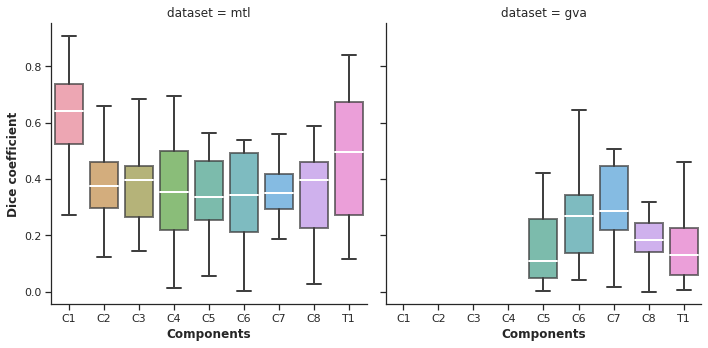

In [255]:
import seaborn as sns
colors=['#efb537']#,'#20b5bf'] #'#273248'
sns.set(style="ticks",  font='sans-serif')
g=sns.catplot(y="Dice",x="components",data=frames_comp, kind="box", legend=True, legend_out=True, col="dataset", col_wrap=2,
             linewidth=2,medianprops=dict(color="white"),palette="husl",
              boxprops=dict(alpha=.7),fliersize=0, aspect=1) #fliersize=0)
#g.fig.set_size_inches(10,5)

#sns.stripplot(x="components", y="Dice",data=frames_comp, col="dataset", col_wrap=2,
 #             size=6, palette=colors, linewidth=1,edgecolor='white')

g.set_axis_labels("Components", "Dice coefficient",fontsize=12, fontweight='bold')
#g.set_tit(" ", "Components",fontsize=12, fontweight='bold')

#g.set_xticklabels(["mtl dataset","gva dataset"],weight='bold',fontsize=12);


